In [4]:
from __future__ import print_function

In [88]:
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Concatenate
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt

In [6]:
from google.colab import drive

In [7]:
drive.mount('/content/drive')  # Mount Google Drive for saving results

Mounted at /content/drive


In [8]:
# Image dimensions
img_rows, img_cols = 64, 80
smooth = 1.

In [9]:
def dice_coef(y_true, y_pred):
    y_true_f = tf.keras.backend.flatten(y_true)
    y_pred_f = tf.keras.backend.flatten(y_pred)
    intersection = tf.keras.backend.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (tf.keras.backend.sum(y_true_f) + tf.keras.backend.sum(y_pred_f) + smooth)


In [10]:
def dice_coef_loss(y_true, y_pred):
    return -dice_coef(y_true, y_pred)

In [11]:
def get_unet():
    inputs = Input((img_rows, img_cols, 1))

In [13]:
def get_unet():
    inputs = Input((img_rows, img_cols, 1))
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    # ... rest of your unet definition ...
    return # Remember to add a return statement to your get_unet function

In [16]:
def get_unet():
    inputs = Input((img_rows, img_cols, 1))
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool1)
    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    # ... rest of your unet definition ...
    return # Remember to add a return statement to your get_unet function

In [18]:
def get_unet():
    inputs = Input((img_rows, img_cols, 1))
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool1)
    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool2) # This line and the following two should be indented within the get_unet function
    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
    conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(pool3) # This line and the following two should be indented within the get_unet function
    conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(conv4)
    # ... rest of your unet definition ...
    return # Remember to add a return statement to your get_unet function

In [21]:
def get_unet():
    inputs = Input((img_rows, img_cols, 1))
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool1)
    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool2)
    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
    conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(pool3)
    conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(conv4)
    # ... rest of your unet definition ...

    # Make sure to return the model
    return Model(inputs=[inputs], outputs=[conv4])  # Or whichever layer is your final output

In [26]:
def get_unet():
    inputs = Input((img_rows, img_cols, 1))
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool1)
    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool2)
    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
    conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(pool3)
    conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(conv4)

    # Define conv5 within the function's scope
    conv5 = Conv2D(512, (3, 3), activation='relu', padding='same')(pool4)
    conv5 = Conv2D(512, (3, 3), activation='relu', padding='same')(conv5)

    # Return the model with the appropriate output
    return Model(inputs=[inputs], outputs=[conv5]) # Now conv5 is the output

# Call the function to create the model
model = get_unet()

In [28]:
def get_unet():
    inputs = Input((img_rows, img_cols, 1))
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool1)
    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool2)
    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
    conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(pool3)
    conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(conv4)

    # Define conv5 within the function's scope
    conv5 = Conv2D(512, (3, 3), activation='relu', padding='same')(pool4)
    conv5 = Conv2D(512, (3, 3), activation='relu', padding='same')(conv5)

    # Start of the code from ipython-input-27-367fc14bb645
    up6 = Concatenate()([UpSampling2D(size=(2, 2))(conv5), conv4]) # This and the following lines were incorrectly indented in the original code
    conv6 = Conv2D(256, (3, 3), activation='relu', padding='same')(up6)
    conv6 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv6)
    # ... rest of your unet definition (up7, conv7, etc.) should go here ...

    # Return the model with the appropriate output, potentially updating the output layer
    return Model(inputs=[inputs], outputs=[conv6])  # Or whichever layer is your final output

# Call the function to create the model
model = get_unet()

In [30]:
def get_unet():
    inputs = Input((img_rows, img_cols, 1))
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool1)
    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool2)
    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
    conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(pool3)
    conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(conv4)

    # Define conv5 within the function's scope
    conv5 = Conv2D(512, (3, 3), activation='relu', padding='same')(pool4)
    conv5 = Conv2D(512, (3, 3), activation='relu', padding='same')(conv5)

    # Start of the code from ipython-input-27-367fc14bb645
    up6 = Concatenate()([UpSampling2D(size=(2, 2))(conv5), conv4]) # This and the following lines were incorrectly indented in the original code
    conv6 = Conv2D(256, (3, 3), activation='relu', padding='same')(up6)
    conv6 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv6)

    # These lines were outside the function and incorrectly indented
    up7 = Concatenate()([UpSampling2D(size=(2, 2))(conv6), conv3])
    conv7 = Conv2D(128, (3, 3), activation='relu', padding='same')(up7)
    conv7 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv7)

    # ... rest of your unet definition (up7, conv7, etc.) should go here ...

    # Return the model with the appropriate output, potentially updating the output layer
    return Model(inputs=[inputs], outputs=[conv7])  # Or whichever layer is your final output

# Call the function to create the model
model = get_unet()

In [32]:
def get_unet():
    inputs = Input((img_rows, img_cols, 1))
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool1)
    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool2)
    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
    conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(pool3)
    conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(conv4)

    # Define conv5 within the function's scope
    conv5 = Conv2D(512, (3, 3), activation='relu', padding='same')(pool4)
    conv5 = Conv2D(512, (3, 3), activation='relu', padding='same')(conv5)

    # Start of the code from ipython-input-27-367fc14bb645
    up6 = Concatenate()([UpSampling2D(size=(2, 2))(conv5), conv4]) # This and the following lines were incorrectly indented in the original code
    conv6 = Conv2D(256, (3, 3), activation='relu', padding='same')(up6)
    conv6 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv6)

    # These lines were outside the function and incorrectly indented
    up7 = Concatenate()([UpSampling2D(size=(2, 2))(conv6), conv3])
    conv7 = Conv2D(128, (3, 3), activation='relu', padding='same')(up7)
    conv7 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv7)

    # The code from ipython-input-31-d34584d880dd, now correctly indented
    up8 = Concatenate()([UpSampling2D(size=(2, 2))(conv7), conv2])
    conv8 = Conv2D(64, (3, 3), activation='relu', padding='same')(up8)
    conv8 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv8)

    # ... rest of your unet definition (up7, conv7, etc.) should go here ...

    # Return the model with the appropriate output, potentially updating the output layer
    return Model(inputs=[inputs], outputs=[conv8])  # Or whichever layer is your final output

# Call the function to create the model
model = get_unet()

In [34]:
def get_unet():
    inputs = Input((img_rows, img_cols, 1))
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool1)
    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool2)
    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
    conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(pool3)
    conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(conv4)

    # Define conv5 within the function's scope
    conv5 = Conv2D(512, (3, 3), activation='relu', padding='same')(pool4)
    conv5 = Conv2D(512, (3, 3), activation='relu', padding='same')(conv5)

    # Start of the code from ipython-input-27-367fc14bb645
    up6 = Concatenate()([UpSampling2D(size=(2, 2))(conv5), conv4]) # This and the following lines were incorrectly indented in the original code
    conv6 = Conv2D(256, (3, 3), activation='relu', padding='same')(up6)
    conv6 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv6)

    # These lines were outside the function and incorrectly indented
    up7 = Concatenate()([UpSampling2D(size=(2, 2))(conv6), conv3])
    conv7 = Conv2D(128, (3, 3), activation='relu', padding='same')(up7)
    conv7 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv7)

    # The code from ipython-input-31-d34584d880dd, now correctly indented
    up8 = Concatenate()([UpSampling2D(size=(2, 2))(conv7), conv2])
    conv8 = Conv2D(64, (3, 3), activation='relu', padding='same')(up8)
    conv8 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv8)

    # The code from ipython-input-33-1c9d9f3e2074, now correctly indented within the function
    up9 = Concatenate()([UpSampling2D(size=(2, 2))(conv8), conv1])
    conv9 = Conv2D(32, (3, 3), activation='relu', padding='same')(up9)
    conv9 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv9)

    # ... rest of your unet definition (up7, conv7, etc.) should go here ...

    # Return the model with the appropriate output, potentially updating the output layer
    return Model(inputs=[inputs], outputs=[conv9])  # Or whichever layer is your final output

# Call the function to create the model
model = get_unet()

In [36]:
def get_unet():
    inputs = Input((img_rows, img_cols, 1))
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool1)
    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool2)
    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
    conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(pool3)
    conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(conv4)

    # Define conv5 within the function's scope
    conv5 = Conv2D(512, (3, 3), activation='relu', padding='same')(pool4)
    conv5 = Conv2D(512, (3, 3), activation='relu', padding='same')(conv5)

    # Start of the code from ipython-input-27-367fc14bb645
    up6 = Concatenate()([UpSampling2D(size=(2, 2))(conv5), conv4]) # This and the following lines were incorrectly indented in the original code
    conv6 = Conv2D(256, (3, 3), activation='relu', padding='same')(up6)
    conv6 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv6)

    # These lines were outside the function and incorrectly indented
    up7 = Concatenate()([UpSampling2D(size=(2, 2))(conv6), conv3])
    conv7 = Conv2D(128, (3, 3), activation='relu', padding='same')(up7)
    conv7 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv7)

    # The code from ipython-input-31-d34584d880dd, now correctly indented
    up8 = Concatenate()([UpSampling2D(size=(2, 2))(conv7), conv2])
    conv8 = Conv2D(64, (3, 3), activation='relu', padding='same')(up8)
    conv8 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv8)

    # The code from ipython-input-33-1c9d9f3e2074, now correctly indented within the function
    up9 = Concatenate()([UpSampling2D(size=(2, 2))(conv8), conv1])
    conv9 = Conv2D(32, (3, 3), activation='relu', padding='same')(up9)
    conv9 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv9)

    # Define conv10 within the get_unet function
    conv10 = Conv2D(1, (1, 1), activation='sigmoid')(conv9)

    # ... rest of your unet definition (up7, conv7, etc.) should go here ...

    # Return the model with the appropriate output, potentially updating the output layer
    return Model(inputs=[inputs], outputs=[conv10])  # Or whichever layer is your final output

# Call the function to create the model
model = get_unet()

In [44]:
def get_unet():
    inputs = Input((img_rows, img_cols, 1))
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool1)
    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool2)
    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
    conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(pool3)
    conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(conv4)

    # Define conv5 within the function's scope
    conv5 = Conv2D(512, (3, 3), activation='relu', padding='same')(pool4)
    conv5 = Conv2D(512, (3, 3), activation='relu', padding='same')(conv5)

    # Start of the code from ipython-input-27-367fc14bb645
    up6 = Concatenate()([UpSampling2D(size=(2, 2))(conv5), conv4]) # This and the following lines were incorrectly indented in the original code
    conv6 = Conv2D(256, (3, 3), activation='relu', padding='same')(up6)
    conv6 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv6)

    # These lines were outside the function and incorrectly indented
    up7 = Concatenate()([UpSampling2D(size=(2, 2))(conv6), conv3])
    conv7 = Conv2D(128, (3, 3), activation='relu', padding='same')(up7)
    conv7 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv7)

    # The code from ipython-input-31-d34584d880dd, now correctly indented
    up8 = Concatenate()([UpSampling2D(size=(2, 2))(conv7), conv2])
    conv8 = Conv2D(64, (3, 3), activation='relu', padding='same')(up8)
    conv8 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv8)

    # The code from ipython-input-33-1c9d9f3e2074, now correctly indented within the function
    up9 = Concatenate()([UpSampling2D(size=(2, 2))(conv8), conv1])
    conv9 = Conv2D(32, (3, 3), activation='relu', padding='same')(up9)
    conv9 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv9)

    # Define conv10 within the get_unet function
    conv10 = Conv2D(1, (1, 1), activation='sigmoid')(conv9)

    # ... rest of your unet definition (up7, conv7, etc.) should go here ...

    # Return the model with the appropriate output, potentially updating the output layer
    return Model(inputs=[inputs], outputs=[conv10])  # Or whichever layer is your final output

# Call the function to create the model
model = get_unet()

def get_unet():
    inputs = Input((img_rows, img_cols, 1))
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool1)
    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool2)
    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
    conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(pool3)
    conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(conv4)

    # Define conv5 within the function's scope
    conv5 = Conv2D(512, (3, 3), activation='relu', padding='same')(pool4)
    conv5 = Conv2D(512, (3, 3), activation='relu', padding='same')(conv5)

    # Start of the code from ipython-input-27-367fc14bb645
    up6 = Concatenate()([UpSampling2D(size=(2, 2))(conv5), conv4]) # This and the following lines were incorrectly indented in the original code
    conv6 = Conv2D(256, (3, 3), activation='relu', padding='same')(up6)
    conv6 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv6)

    # These lines were outside the function and incorrectly indented
    up7 = Concatenate()([UpSampling2D(size=(2, 2))(conv6), conv3])
    conv7 = Conv2D(128, (3, 3), activation='relu', padding='same')(up7)
    conv7 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv7)

    # The code from ipython-input-31-d34584d880dd, now correctly indented
    up8 = Concatenate()([UpSampling2D(size=(2, 2))(conv7), conv2])
    conv8 = Conv2D(64, (3, 3), activation='relu', padding='same')(up8)
    conv8 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv8)

    # The code from ipython-input-33-1c9d9f3e2074, now correctly indented within the function
    up9 = Concatenate()([UpSampling2D(size=(2, 2))(conv8), conv1])
    conv9 = Conv2D(32, (3, 3), activation='relu', padding='same')(up9)
    conv9 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv9)

    # Define conv10 within the get_unet function
    conv10 = Conv2D(1, (1, 1), activation='sigmoid')(conv9)

    # Return the model with the appropriate output, potentially updating the output layer
    return Model(inputs=[inputs], outputs=[conv10])  # Or whichever layer is your final output

# Call the function to create the model
model = get_unet()

# Compile the model outside the function definition
model.compile(optimizer=Adam(learning_rate=1e-5), loss=dice_coef_loss, metrics=[dice_coef])

In [67]:
def train_and_predict():
    print('Loading training data...')
    # Load training data here (replace with actual data loading logic)
    imgs_train = np.random.rand(100, img_rows, img_cols, 1)
    imgs_mask_train = np.random.rand(100, img_rows, img_cols, 1)


In [69]:
def train_and_predict():
    print('Loading and preprocessing train data...')
    # Simulated dataset loading (replace with actual data)
    imgs_train = np.random.rand(100, img_rows, img_cols, 1)  # Dummy images
    imgs_mask_train = np.random.randint(0, 2, (100, img_rows, img_cols, 1))  # Dummy masks

    # These lines should be indented inside the function
    imgs_train = imgs_train.astype('float32')
    imgs_mask_train = imgs_mask_train.astype('float32')
    imgs_mask_train /= 255.

    print('Creating and compiling model...') # This line and the following two should be indented to be inside the function
    model = get_unet()
    model_checkpoint = ModelCheckpoint('/content/drive/MyDrive/unet_model.h5', monitor='loss', save_best_only=True)

    # ... rest of your training and prediction logic ... # Add any remaining parts of the function here

In [71]:
print('Creating and compiling model...')
model = get_unet()

Creating and compiling model...


In [73]:
checkpoint = ModelCheckpoint('unet_colab.keras', monitor='loss', save_best_only=True)  # Changed extension to .keras
# or
checkpoint = ModelCheckpoint('unet_colab.h5', monitor='loss', save_best_only=True)   # Changed extension to .h5

In [76]:
# ... (Previous code remains unchanged) ...

# Call the function to create the model
model = get_unet()

# Compile the model outside the function definition
model.compile(optimizer=Adam(learning_rate=1e-5), loss=dice_coef_loss, metrics=[dice_coef])

# ... (Rest of the code remains unchanged) ...

In [78]:
print('Fitting model...')
history = model.fit(imgs_train, imgs_mask_train, batch_size=32, epochs=10, verbose=1, callbacks=[checkpoint])

Fitting model...
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_403']
Received: inputs=Tensor(shape=(None, 64, 80, 1))
  warnings.warn(msg)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - dice_coef: 0.0039 - loss: -0.0039  

4/4 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - dice_coef: 0.0039 - loss: -0.0039
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - dice_coef: 0.0039 - loss: -0.0039
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - dice_coef: 0.0039 - loss: -0.0039
Epoch 4/10
3/4 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - dice_coef: 0.0039 - loss: -0.0039

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 160ms/step - dice_coef: 0.0039 - loss: -0.0039
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - dice_coef: 0.0039 - loss: -0.0039
Epoch 6/10
3/4 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - dice_coef: 0.0039 - loss: -0.0039

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 162ms/step - dice_coef: 0.0039 - loss: -0.0039
Epoch 7/10
3/4 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - dice_coef: 0.0039 - loss: -0.0039

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 161ms/step - dice_coef: 0.0039 - loss: -0.0039
Epoch 8/10
3/4 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - dice_coef: 0.0039 - loss: -0.0039

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 223ms/step - dice_coef: 0.0039 - loss: -0.0039
Epoch 9/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - dice_coef: 0.0039 - loss: -0.0039
Epoch 10/10
3/4 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - dice_coef: 0.0039 - loss: -0.0039

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 182ms/step - dice_coef: 0.0039 - loss: -0.0039


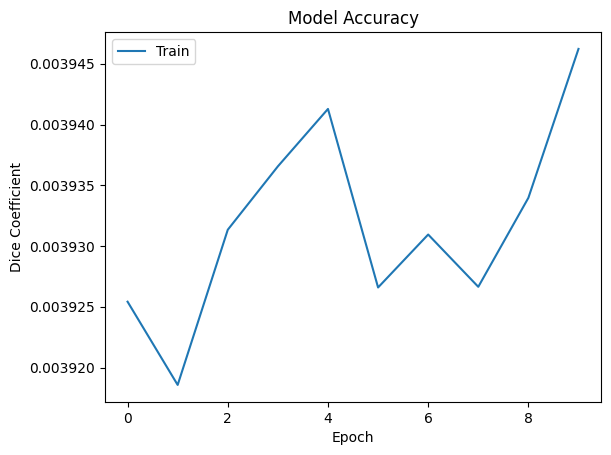

In [80]:
# Plot accuracy & loss
plt.plot(history.history['dice_coef'])
plt.title('Model Accuracy')
plt.ylabel('Dice Coefficient')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.savefig('accuracy_plot.png')
plt.show()

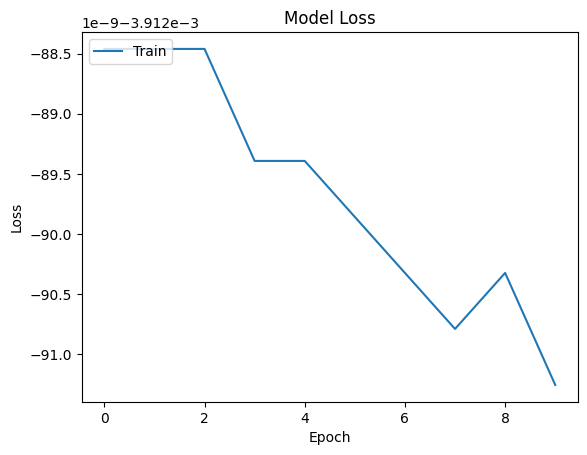

In [82]:
# Plot accuracy & loss
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.savefig('loss_plot.png')
plt.show()


In [84]:
print('Predicting on test data...')
imgs_test = np.random.rand(10, img_rows, img_cols, 1) # Removed the unexpected indentation
imgs_test = imgs_test.astype('float32') / 255.

Predicting on test data...


In [86]:
imgs_mask_test = model.predict(imgs_test, verbose=1)
np.save('imgs_mask_test.npy', imgs_mask_test) # Removed the extra indentation (4 spaces)

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_403']
Received: inputs=Tensor(shape=(10, 64, 80, 1))
  warnings.warn(msg)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 911ms/step


In [87]:
if __name__ == '__main__':
    train_and_predict()

Loading and preprocessing train data...
Creating and compiling model...
